# Starbuck Locations Worldwide #

### Starbucks is a worldwide famous coffee shop brand. Its stores are all over the world, expecially in USA and CHINA. ###


### The data that I used included the information of all the branch all over the world. In this notebook I try to find out: ###

#### 1. the number of stores in each country.  ####
#### 2. the relationship between latitude & longitude and store distribution.  ####
#### 3. distribution of stores all over world.  ####
#### 4. the ownership structure of all the stores all over woeld.  ####

## 1. Import Libraries ##


In [94]:
import plotly
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.patches as mpatches
from subprocess import check_output
from plotly.graph_objs import *
import plotly.plotly as py
import os

%matplotlib inline
plotly.offline.init_notebook_mode(connected=True)


## 2. Import and Observe Dataset ##

### Observe the type of data, summarize and classify, and extract data that can be analyzed.

In [10]:
starbucks = pd.read_csv('directory.csv')
starbucks.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

### 2.1 There are many different kinds of data in the csv. As you can see, I found that Ownership Type & City and Longitude	Latitude are some interesting data. ###

In [11]:
starbucks.shape

(25600, 13)

In [8]:
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


### 2.2 Missing Data ###
### If data is missing a lot, it is not good for analysis. ###

In [7]:
starbucks.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [16]:
starbucks.notnull().sum() * 100/starbucks.shape[0]

Brand             100.000000
Store Number      100.000000
Store Name        100.000000
Ownership Type    100.000000
Street Address     99.992188
City               99.941406
State/Province    100.000000
Country           100.000000
Postcode           94.054688
Phone Number       73.199219
Timezone          100.000000
Longitude          99.996094
Latitude           99.996094
dtype: float64

## 3. Basic analysis ##

### At first, I did some basic analysis to find out what I can do next.

### 3.1 Top 20 Countries locations for Starbucks stores ###

In [13]:
starbucks.Country.value_counts().head(20)

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
TH      289
ID      268
MY      234
DE      160
AE      144
FR      132
SG      130
RU      109
AR      108
KW      106
Name: Country, dtype: int64

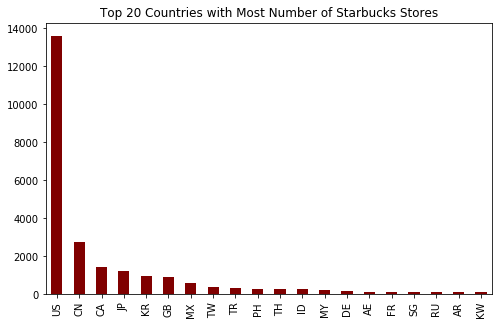

In [24]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top 20 Countries with Most Number of Starbucks Stores")
starbucks.Country.value_counts().head(20).plot(kind="byyyyyyyyyyyyyytttttggytyyyttgggtttyggar", color = "maroon")

### 3.2 Top 20 City locations for Starbucks stores ###


In [95]:
starbucks.City.value_counts().head(20)

上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Las Vegas      156
Seattle        156
Houston        154
Istanbul       144
Vancouver      141
서울             136
San Diego      135
Calgary        130
Los Angeles    127
Singapore      127
Taipei City    126
Jakarta        123
Name: City, dtype: int64

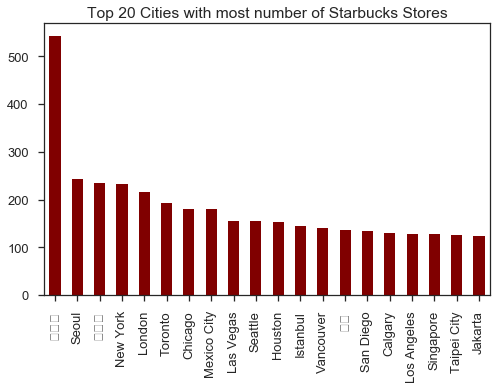

In [96]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top 20 Cities with most number of Starbucks Stores")
starbucks.City.value_counts().head(20).plot(kind="bar",color = "maroon")
plt.show()

### 3.3 Ownership Structure ###

### This data is very usefel. 

In [28]:
starbucks['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

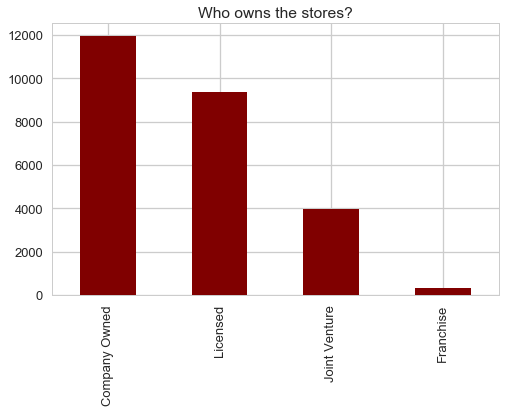

In [31]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Who owns the stores?")
starbucks['Ownership Type'].value_counts().plot(kind="bar", color = "maroon")
plt.show()

### 3.4 Ownership Structure ###

### This data cannot find out some information.


In [97]:
starbucks['Brand'].value_counts()

Starbucks                25249
Teavana                    348
Evolution Fresh              2
Coffee House Holdings        1
Name: Brand, dtype: int64

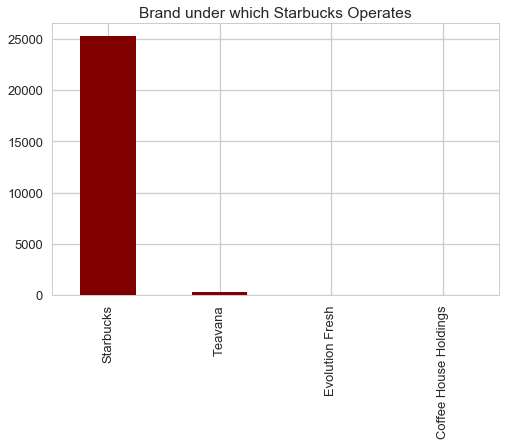

In [30]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title="Brand under which Starbucks Operates")
starbucks.Brand.value_counts().plot(kind="bar", color = "maroon")
plt.show()

## 4. the number of stores in each country ##



### First, mapping a global map to explore distribution of all branches. Try to find out which country or area are important.

In [81]:
to_plot = starbucks['Country'].value_counts().to_frame().reset_index().rename(columns={"index":"Country","Country":"Count"})
to_plot.head()

country_code = [('Afghanistan','AF','AFG'),('Aland Islands','AX','ALA'),('Albania','AL','ALB'),('Algeria','DZ','DZA'),('American Samoa','AS','ASM'),('Andorra','AD','AND'),('Angola','AO','AGO'),('Anguilla','AI','AIA'),('Antarctica','AQ','ATA'),('Antigua and Barbuda','AG','ATG'),('Argentina','AR','ARG'),('Armenia','AM','ARM'),('Aruba','AW','ABW'),('Australia','AU','AUS'),('Austria','AT','AUT'),('Azerbaijan','AZ','AZE'),('Bahamas','BS','BHS'),('Bahrain','BH','BHR'),('Bangladesh','BD','BGD'),('Barbados','BB','BRB'),('Belarus','BY','BLR'),('Belgium','BE','BEL'),('Belize','BZ','BLZ'),('Benin','BJ','BEN'),('Bermuda','BM','BMU'),('Bhutan','BT','BTN'),('Bolivia','BO','BOL'),('Bosnia and Herzegovina','BA','BIH'),('Botswana','BW','BWA'),('Bouvet Island','BV','BVT'),('Brazil','BR','BRA'),('British Virgin Islands','VG','VGB'),('British Indian Ocean Territory','IO','IOT'),('Brunei Darussalam','BN','BRN'),('Bulgaria','BG','BGR'),('Burkina Faso','BF','BFA'),('Burundi','BI','BDI'),('Cambodia','KH','KHM'),('Cameroon','CM','CMR'),('Canada','CA','CAN'),('Cape Verde','CV','CPV'),('Cayman Islands','KY','CYM'),('Central African Republic','CF','CAF'),('Chad','TD','TCD'),('Chile','CL','CHL'),('China','CN','CHN'),('Hong Kong, Special Administrative Region of China','HK','HKG'),('Macao, Special Administrative Region of China','MO','MAC'),('Christmas Island','CX','CXR'),('Cocos (Keeling) Islands','CC','CCK'),('Colombia','CO','COL'),('Comoros','KM','COM'),('Congo (Brazzaville)','CG','COG'),('Congo, Democratic Republic of the','CD','COD'),('Cook Islands','CK','COK'),('Costa Rica','CR','CRI'),('Côte dIvoire','CI','CIV'),('Croatia','HR','HRV'),('Cuba','CU','CUB'),('Cyprus','CY','CYP'),('Czech Republic','CZ','CZE'),('Denmark','DK','DNK'),('Djibouti','DJ','DJI'),('Dominica','DM','DMA'),('Dominican Republic','DO','DOM'),('Ecuador','EC','ECU'),('Egypt','EG','EGY'),('El Salvador','SV','SLV'),('Equatorial Guinea','GQ','GNQ'),('Eritrea','ER','ERI'),('Estonia','EE','EST'),('Ethiopia','ET','ETH'),('Falkland Islands (Malvinas)','FK','FLK'),('Faroe Islands','FO','FRO'),('Fiji','FJ','FJI'),('Finland','FI','FIN'),('France','FR','FRA'),('French Guiana','GF','GUF'),('French Polynesia','PF','PYF'),('French Southern Territories','TF','ATF'),('Gabon','GA','GAB'),('Gambia','GM','GMB'),('Georgia','GE','GEO'),('Germany','DE','DEU'),('Ghana','GH','GHA'),('Gibraltar','GI','GIB'),('Greece','GR','GRC'),('Greenland','GL','GRL'),('Grenada','GD','GRD'),('Guadeloupe','GP','GLP'),('Guam','GU','GUM'),('Guatemala','GT','GTM'),('Guernsey','GG','GGY'),('Guinea','GN','GIN'),('Guinea-Bissau','GW','GNB'),('Guyana','GY','GUY'),('Haiti','HT','HTI'),('Heard Island and Mcdonald Islands','HM','HMD'),('Holy See (Vatican City State)','VA','VAT'),('Honduras','HN','HND'),('Hungary','HU','HUN'),('Iceland','IS','ISL'),('India','IN','IND'),('Indonesia','ID','IDN'),('Iran, Islamic Republic of','IR','IRN'),('Iraq','IQ','IRQ'),('Ireland','IE','IRL'),('Isle of Man','IM','IMN'),('Israel','IL','ISR'),('Italy','IT','ITA'),('Jamaica','JM','JAM'),('Japan','JP','JPN'),('Jersey','JE','JEY'),('Jordan','JO','JOR'),('Kazakhstan','KZ','KAZ'),('Kenya','KE','KEN'),('Kiribati','KI','KIR'),("Korea, Democratic People's Republic of",'KP','PRK'),('Korea, Republic of','KR','KOR'),('Kuwait','KW','KWT'),('Kyrgyzstan','KG','KGZ'),('Lao PDR','LA','LAO'),('Latvia','LV','LVA'),('Lebanon','LB','LBN'),('Lesotho','LS','LSO'),('Liberia','LR','LBR'),('Libya','LY','LBY'),('Liechtenstein','LI','LIE'),('Lithuania','LT','LTU'),('Luxembourg','LU','LUX'),
                ('Macedonia, Republic of','MK','MKD'),('Madagascar','MG','MDG'),('Malawi','MW','MWI'),('Malaysia','MY','MYS'),('Maldives','MV','MDV'),('Mali','ML','MLI'),('Malta','MT','MLT'),('Marshall Islands','MH','MHL'),('Martinique','MQ','MTQ'),('Mauritania','MR','MRT'),('Mauritius','MU','MUS'),('Mayotte','YT','MYT'),('Mexico','MX','MEX'),('Micronesia, Federated States of','FM','FSM'),('Moldova','MD','MDA'),('Monaco','MC','MCO'),('Mongolia','MN','MNG'),('Montenegro','ME','MNE'),('Montserrat','MS','MSR'),('Morocco','MA','MAR'),('Mozambique','MZ','MOZ'),('Myanmar','MM','MMR'),('Namibia','NA','NAM'),('Nauru','NR','NRU'),('Nepal','NP','NPL'),('Netherlands','NL','NLD'),('Netherlands Antilles','AN','ANT'),('New Caledonia','NC','NCL'),('New Zealand','NZ','NZL'),('Nicaragua','NI','NIC'),('Niger','NE','NER'),('Nigeria','NG','NGA'),('Niue','NU','NIU'),('Norfolk Island','NF','NFK'),('Northern Mariana Islands','MP','MNP'),('Norway','NO','NOR'),('Oman','OM','OMN'),('Pakistan','PK','PAK'),('Palau','PW','PLW'),('Palestinian Territory, Occupied','PS','PSE'),('Panama','PA','PAN'),('Papua New Guinea','PG','PNG'),('Paraguay','PY','PRY'),('Peru','PE','PER'),('Philippines','PH','PHL'),('Pitcairn','PN','PCN'),('Poland','PL','POL'),('Portugal','PT','PRT'),('Puerto Rico','PR','PRI'),('Qatar','QA','QAT'),('Réunion','RE','REU'),('Romania','RO','ROU'),('Russian Federation','RU','RUS'),('Rwanda','RW','RWA'),('Saint-Barthélemy','BL','BLM'),('Saint Helena','SH','SHN'),('Saint Kitts and Nevis','KN','KNA'),('Saint Lucia','LC','LCA'),('Saint-Martin (French part)','MF','MAF'),('Saint Pierre and Miquelon','PM','SPM'),('Saint Vincent and Grenadines','VC','VCT'),('Samoa','WS','WSM'),('San Marino','SM','SMR'),('Sao Tome and Principe','ST','STP'),('Saudi Arabia','SA','SAU'),('Senegal','SN','SEN'),('Serbia','RS','SRB'),('Seychelles','SC','SYC'),('Sierra Leone','SL','SLE'),('Singapore','SG','SGP'),('Slovakia','SK','SVK'),('Slovenia','SI','SVN'),('Solomon Islands','SB','SLB'),('Somalia','SO','SOM'),('South Africa','ZA','ZAF'),('South Georgia and the South Sandwich Islands','GS','SGS'),('South Sudan','SS','SSD'),('Spain','ES','ESP'),('Sri Lanka','LK','LKA'),('Sudan','SD','SDN'),('Suriname *','SR','SUR'),('Svalbard and Jan Mayen Islands','SJ','SJM'),('Swaziland','SZ','SWZ'),('Sweden','SE','SWE'),('Switzerland','CH','CHE'),('Syrian Arab Republic (Syria)','SY','SYR'),('Taiwan, Republic of China','TW','TWN'),('Tajikistan','TJ','TJK'),('Tanzania *, United Republic of','TZ','TZA'),('Thailand','TH','THA'),('Timor-Leste','TL','TLS'),('Togo','TG','TGO'),('Tokelau','TK','TKL'),('Tonga','TO','TON'),('Trinidad and Tobago','TT','TTO'),('Tunisia','TN','TUN'),('Turkey','TR','TUR'),('Turkmenistan','TM','TKM'),('Turks and Caicos Islands','TC','TCA'),('Tuvalu','TV','TUV'),('Uganda','UG','UGA'),('Ukraine','UA','UKR'),('United Arab Emirates','AE','ARE'),('United Kingdom','GB','GBR'),('United States of America','US','USA'),('United States Minor Outlying Islands','UM','UMI'),('Uruguay','UY','URY'),('Uzbekistan','UZ','UZB'),('Vanuatu','VU','VUT'),('Venezuela (Bolivarian Republic of)','VE','VEN'),('Viet Nam','VN','VNM'),('Virgin Islands, US','VI','VIR'),('Wallis and Futuna Islands','WF','WLF'),('Western Sahara','EH','ESH'),
                ('Yemen','YE','YEM'),('Zambia','ZM','ZMB'),('Zimbabwe','ZW','ZWE')]
labels = ["CountryName","Country","CountryCode"]
cc_starbucks = pd.DataFrame.from_records(country_code,columns=labels)



plots = pd.merge(to_plot,cc_df,on="Country",how="left")
plots.head()



data = [ dict(
        type='choropleth',
        autocolorscale = False,
        locations = plots["CountryCode"],
        z = plots["Count"],
        text = plots["CountryName"],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Count")
        ) ]

layout = dict(
        title= 'Number of Starbucks in Countries',
        geo = dict(
            showframe = False,            
            scope='world',
            projection=dict( type='Mercator' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot( fig,validate=False, filename='d3-cloropleth-map' )

### USA have the most brands and CHINA is the second. Other countries are obviously less than USA and CHINA.


## 5. the relationship between latitude & longitude and store distribution ##

### In addition to the country, the region is also an important data. Differences of latitude and longitude can also be seen differences in distribution.

### 5.1 the Entire World ###

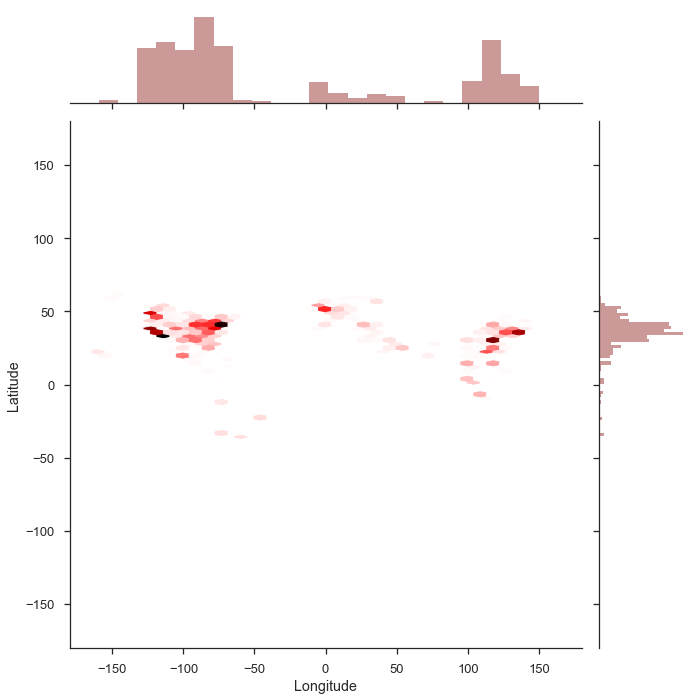

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.set_context("talk")

x =  starbucks['Longitude']
y =  starbucks['Latitude']

sns.jointplot(x, y, kind="hex", size=10, color="maroon", stat_func=None, 
              xlim=(-180,180), ylim=(-180,180))

### Most brand are in Latitude 50 and Longitude -100 and 125.

### 5.2 North America ###


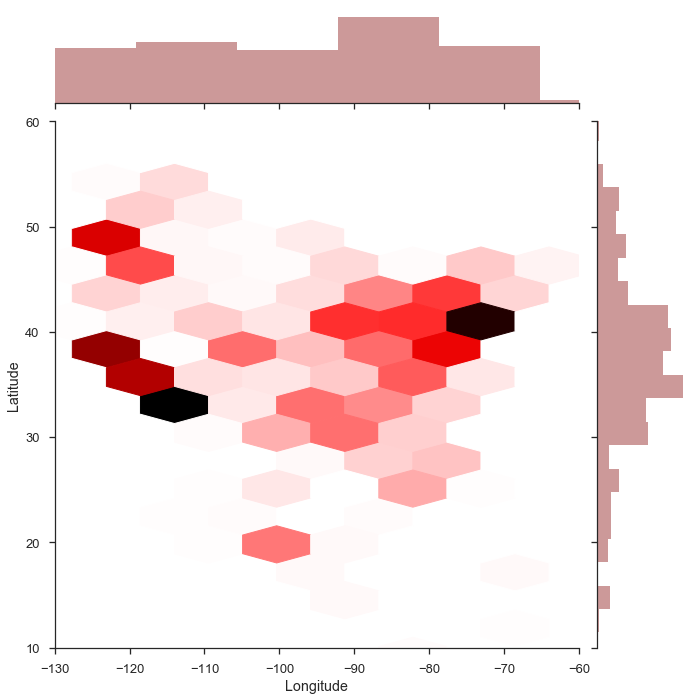

In [99]:
sns.jointplot(x, y, kind="hex", size=10, color="maroon", 
              xlim=(-130,-60), ylim=(10,60), stat_func=None)

### 5.3 Asia ###

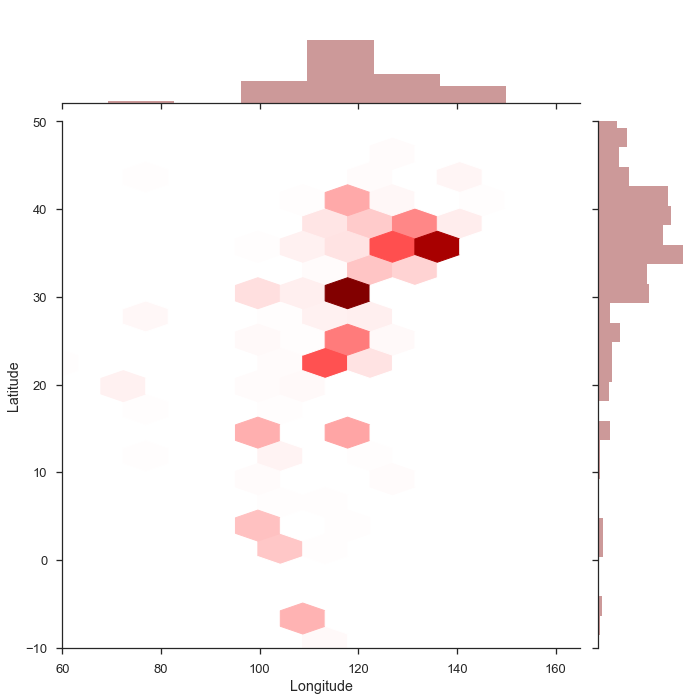

In [103]:
sns.jointplot(x, y, kind="hex", size=10, color="maroon", 
              xlim=(60,165), ylim=(-10,50), stat_func=None)

### 5.4 Europe ###


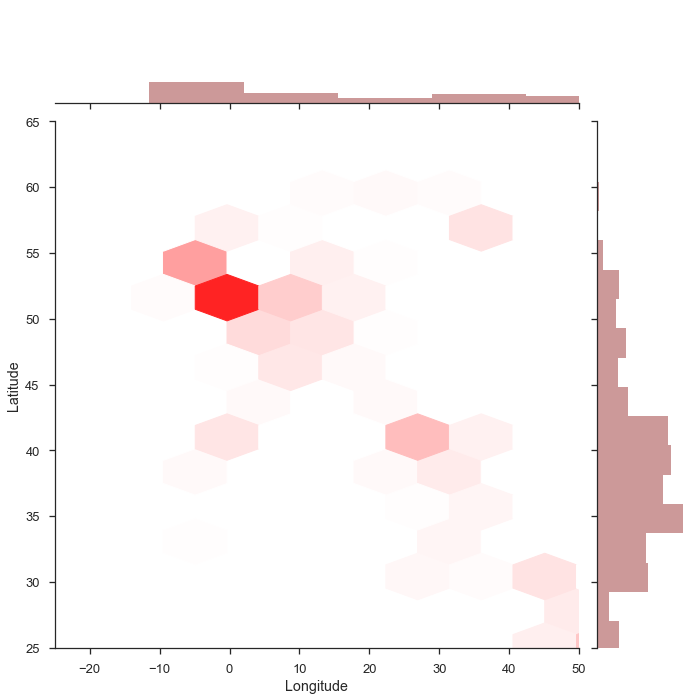

In [101]:
sns.jointplot(x, y, kind="hex", size=10, color="maroon", 
              xlim=(-25,50), ylim=(25,65), stat_func=None)

## 6. distribution of stores all over world. ##

### USA, CHINA and EUROPE have most brand.###
### There are obviously more brands in the coastal area. ###

### 6.1 the entire world ###

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



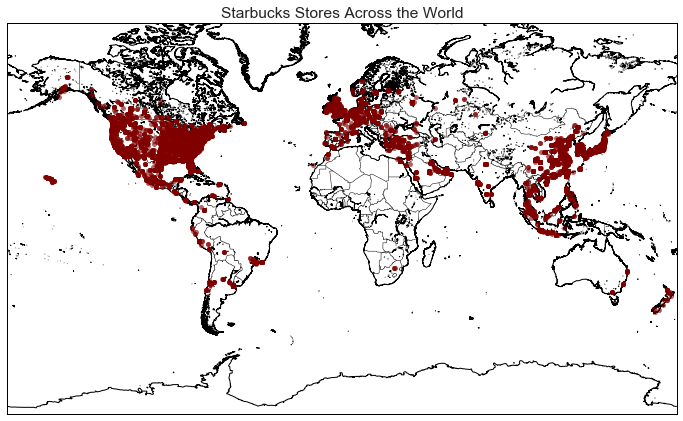

In [75]:
plt.figure(figsize=(12,9))
m = Basemap(projection = 'mill', llcrnrlat = -80, urcrnrlat = 80, llcrnrlon = -180, urcrnrlon = 180, resolution = 'h')
m.drawcoastlines()
m.drawcountries()

m.drawmapboundary(fill_color='white')

x, y = m(list(starbucks["Longitude"].astype(float)), list(starbucks["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 5, alpha = 0.6, color = "maroon")

plt.title('Starbucks Stores Across the World')
plt.show()


### 6.2 USA ###

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



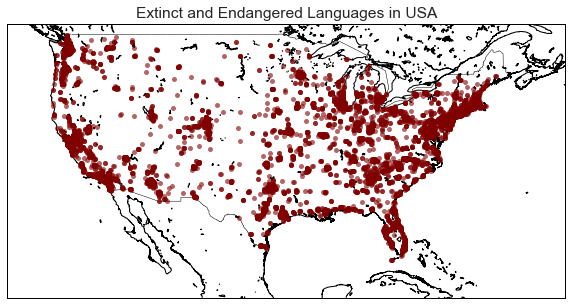

In [76]:
usa_states = starbucks[starbucks['Country'] == 'US']


plt.figure(figsize=(10,8))
m = Basemap(projection='mill', llcrnrlat = 20, urcrnrlat = 50, llcrnrlon = -130, urcrnrlon = -60, resolution = 'h')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')

x, y = m(list(usa_states["Longitude"].astype(float)), list(usa_states["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 5 ,color = "maroon", alpha = 0.6)

plt.title('Extinct and Endangered Languages in USA')
plt.show()

### 6.3 CHINA ###

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



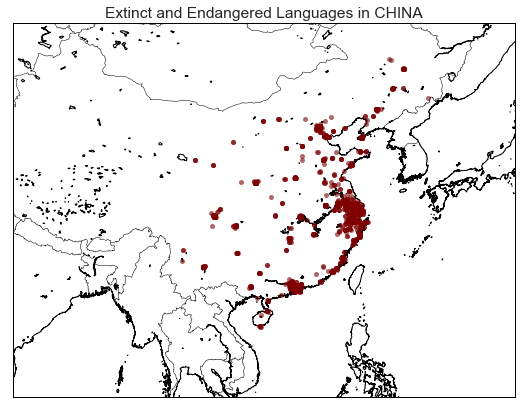

In [104]:
china_states = starbucks[starbucks['Country'] == 'CN']


plt.figure(figsize=(9,12))
m = Basemap(projection='mill', llcrnrlat = 10, urcrnrlat =50, llcrnrlon = 80, urcrnrlon = 140, resolution = 'h')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='white')

x, y = m(list(china_states["Longitude"].astype(float)), list(china_states["Latitude"].astype(float)))
m.plot(x, y, 'bo', markersize = 5 ,color = "maroon", alpha = 0.6)

plt.title('Extinct and Endangered Languages in CHINA')
plt.show()

### In the United States distribution are more evenly distributed. ###
### In CHINA distribution are more concentrated. ###

## 7. the ownership structure of all the stores ##

##  Process

### 1. Plot coastlines and country borders.
### 2. Fill continents and color wet areas.
### 3. Color coding the store by ownership type.
### 4. Loop through each location to plot the individual stores.
### 5. Drop the color-code column after use.
### 6. Hack together a legend








### 7.1 the entire world ###

### As you can see, different color shows different ownership on the map. ###

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.



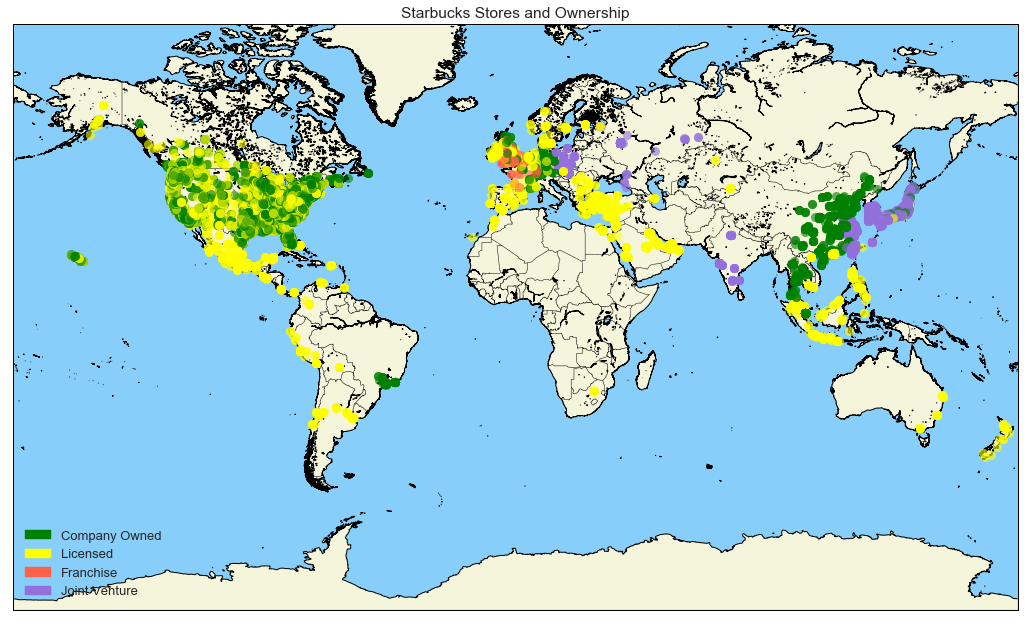

In [93]:
f, ax = plt.subplots(figsize=(18,12))
map = Basemap(projection='mill', 
              llcrnrlat = -80,
              urcrnrlat = 80,
              llcrnrlon = -180,
              urcrnrlon = 180,
              resolution = 'h')

map.drawcoastlines()
map.drawcountries()

map.drawmapboundary(fill_color='lightskyblue')
map.fillcontinents(color='white',
                   lake_color='lightskyblue')

markerCode = {'Company Owned': 'green', 
              'Licensed': 'yellow',
              'Franchise': 'tomato',
              'Joint Venture': 'mediumpurple'}
starbucks['ownerColorCode'] = starbucks['Ownership Type'].map(markerCode)


lons, lats = map(list(starbucks["Longitude"].astype(float)),
                 list(starbucks["Latitude"].astype(float)))
colors = list(starbucks['ownerColorCode'])

for lon, lat, owner in zip(lons, lats, colors):
    x, y = lon, lat
    marker_string = owner
    map.plot(x, y, 'bo', alpha = 0.6, color = marker_string)

starbucks.drop(['ownerColorCode'], axis=1, inplace=True)

legend_handles = [mpatches.Patch(color = color_code, label = owner) for owner, color_code in markerCode.items()]
ax.legend(loc='lower left',
          handles = legend_handles)

plt.title('Starbucks Stores and Ownership')
plt.show()

### 7.2 Europe ###

### Different countries in Europe have different ownership. ###

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning:

The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning:

The ishold function was deprecated in version 2.0.

/Users/PeLu/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning:

axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.

/Users/PeLu/anaconda3/li

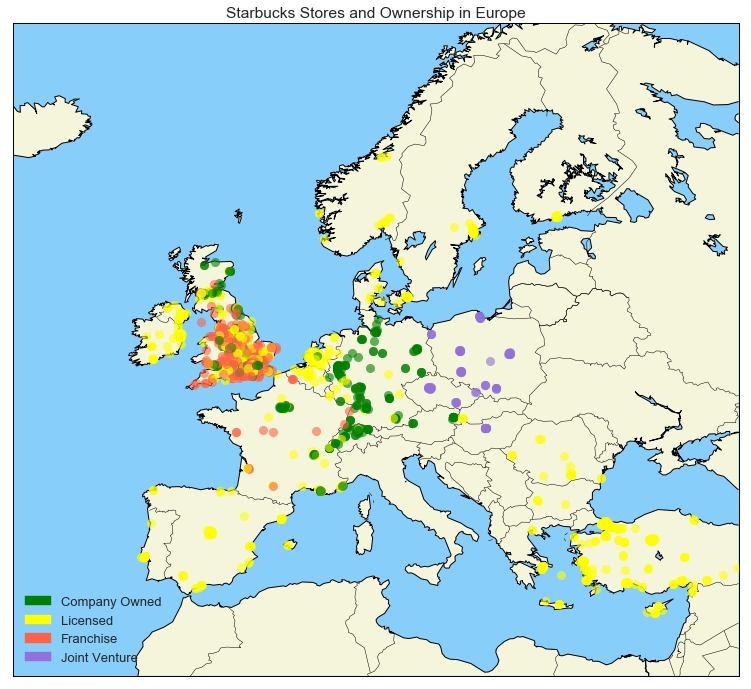

In [92]:
europe =['BE', 'EL', 'LT', 'PT', 'BG', 'ES', 'LU', 'RO', 'CZ', 'FR', 'HU', 'SI', 'DK', 'GB', 'GR', 'HR', 'MT', 'SK', 'DE', 'IT', 'NL', 'FI', 'EE', 'CY', 'AT', 'SE', 'IE', 'LV', 'PL', 'UK', 'IS', 'NO', 'LI', 'CH', 'TR']
european_stores = starbucks[starbucks['Country'].isin(europe)]

f, ax = plt.subplots(figsize=(18,12))

map = Basemap(projection='mill', 
              llcrnrlat = 30,
              urcrnrlat = 70,
              llcrnrlon = -20,
              urcrnrlon = 40,
              resolution = 'l')

map.drawcoastlines()
map.drawcountries()

map.drawmapboundary(fill_color='lightskyblue')
map.fillcontinents(color='white',
                   lake_color='lightskyblue')

markerCode = {'Company Owned': 'green', 
              'Licensed': 'yellow',
              'Franchise': 'tomato',
              'Joint Venture': 'mediumpurple'}
european_stores['ownerColorCode'] = european_stores['Ownership Type'].map(markerCode)


lons, lats = map(list(european_stores["Longitude"].astype(float)),
                 list(european_stores["Latitude"].astype(float)))
colors = list(european_stores['ownerColorCode'])

for lon, lat, owner in zip(lons, lats, colors):
    x, y = lon, lat
    marker_string = owner
    map.plot(x, y, 'bo', alpha = 0.6, color = marker_string)

european_stores.drop(['ownerColorCode'], axis=1, inplace=True)

legend_handles = [mpatches.Patch(color = color_code, label = owner) for owner, color_code in markerCode.items()]
ax.legend(loc='lower left',
          handles = legend_handles)

plt.title('Starbucks Stores and Ownership in Europe')
plt.show()